In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import copy
# PATH = os.gcwd()


# Q1

In [2]:
def project2D(w,pp,phi,skew):
    # Using eq 14.5
    x = ((phi[0]*w[0] + w[1]*skew)/w[2])+pp[0]
    y = (phi[1]*w[1]/w[2])+pp[1]
    return np.array([x, y])

w = np.array([-50, 20, 200])
princPtn = np.array([256, 256])
p = np.array([200,200])
# p = np.array([100,100])
s = 0

X = project2D(w, princPtn, p, s)

print(f'Coordinates of 2D proj : {X}')


Coordinates of 2D proj : [206. 276.]


# Q2

In [3]:
C = np.array([[0,0,200],[50,0,200],[50,50,200],[0,50,200],[0,0,250],[50,0,250],[50,50,250],[0,50,250]])
# C = C + 25
# print(C)
X = np.zeros((C.shape[0], C.shape[1]-1))
# X.shape

i = 0

for w in C:
    # x = ((phi[0]*w[0] + w[1]*skew)/w[2])+pp[0]
    # y = (phi[1]*w[1]/w[2])+pp[1]
    # X[i] = np.array([x, y])
    X[i] = project2D(w, princPtn, p, s)
    i+=1

X


array([[256., 256.],
       [306., 256.],
       [306., 306.],
       [256., 306.],
       [256., 256.],
       [296., 256.],
       [296., 296.],
       [256., 296.]])

## 2D projection:

 <img src="imgs/2d_proj.png" width=400 height=400 />

In [8]:
def plotProj(proj):
    proj = np.hstack((X, np.zeros((X.shape[0], 1))))
    print(proj.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter3D(proj[:, 0], proj[:, 1], proj[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # ax.set_xlim(400, 800)
    ax.set_xlim(200,500)
    ax.set_ylim(200,500)
    verts = [[proj[0], proj[1], proj[2], proj[3]], [proj[4], proj[5], proj[6], proj[7]], [
        proj[0], proj[1], proj[5], proj[4]], [proj[3], proj[2], proj[6], proj[7]]]
    #[X[1],X[2],X[6],X[5]], [X[1],X[2],X[5],X[7]]]

    # plot sides
    ax.add_collection3d(Poly3DCollection(verts, facecolors='w',
                                         linewidths=1, edgecolors='k', alpha=.25))
    ax.view_init(90, 90)


# Q3

------------
 Using eq Homegenous coordinates
[[360.11341011 256.        ]
 [387.15455763 256.        ]
 [387.15455763 307.94556108]
 [360.11341011 317.03872944]
 [311.28242656 256.        ]
 [339.57803284 256.        ]
 [339.57803284 298.83263655]
 [311.28242656 304.83098355]]
------------
 Using eq 14.8
(8, 2)
(8, 3)


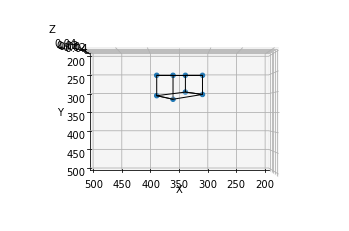

In [9]:
t = np.radians(35)
d = np.array([200,0,0])
# dx = 0
# dy = 0
# dz = 0
def sin(x): return np.sin(x)
def cos(x): return np.cos(x)

# Using homogeneous coordinates


def homogeneous2DProj(w, princPtn, p, s, d, t):
    A = np.array([[p[0], s, princPtn[0], 0], [0, p[1], princPtn[1], 0], [0, 0, 1, 0]])
    O = np.array([[cos(t), 0, -sin(t)], [0, 1, 0], [sin(t), 0, cos(t)], [0, 0, 0]])
    T = np.array([[d[0]], [d[1]], [d[2]], [1]])
    motionMat = np.hstack((O, T))
    X_ = A @ motionMat @ w
    X = X_/X_[2]
    return X[:2].reshape((2))

def project2DwTransform(w, princPtn, p, s, d, t):
    w11 = cos(t)
    w12 = 0
    w13 = -sin(t)
    w21 = 0
    w22 = 1
    w23 = 0
    w31 = sin(t)
    w32 = 0
    w33 = cos(t)

    u = w[0]
    v = w[1]
    w = w[2]

    x = (p[0]*(w11*u + w12*v + w13*w + d[0]) + s*(w21*u + w22*v + w23*w + d[2]))/(w31*u + w32*v + w33*w + d[2]) + princPtn[0]
    y = (p[1]*(w21*u + w22*v + w23*w + d[1])/(w31*u + w32*v + w33*w + d[2])) + princPtn[1]

    return np.array([x, y])

# def sin(x):
#     return np.sin(x)
# def cos(x):
#     return np.cos(x)
# motionMat = np.hstack((O, T))
# print(motionMat.shape)
# w = np.vstack((np.reshape(C[7], (3,1)), [1]))
# print(w.shape)


# X_ = A @ motionMat @ w
# X_/X_[2]
# homogeneous2DProj(w, princPtn, p, s, d, t)
print('------------\n Using eq Homegenous coordinates')
i = 0
X = np.zeros((C.shape[0], C.shape[1]-1))
for w in C:
    w_ = np.vstack((np.reshape(w, (3, 1)), [1]))
    X[i] = homogeneous2DProj(w_, princPtn, p, s, d, t)
    i += 1

print(X)
print('------------\n Using eq 14.8')

i = 0
for w in C:
    # w = np.vstack((np.reshape(w, (3, 1)), [1]))
    X[i] = project2DwTransform(w, princPtn, p, s, d, t)
    i += 1

print(X.shape)

plotProj(X)



# Other questions

## Doubling the focal length

* Doubling the focal length will have the effect of 2x zoom and halfing it will have the effect of 0.5x zoom 

[[464.22682022 256.        ]
 [518.30911526 256.        ]
 [518.30911526 359.89112215]
 [464.22682022 378.07745888]
 [366.56485312 256.        ]
 [423.15606567 256.        ]
 [423.15606567 341.6652731 ]
 [366.56485312 353.6619671 ]]


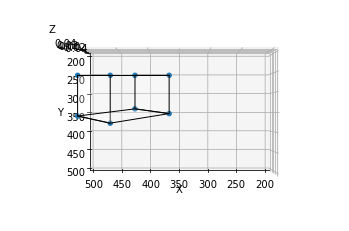

In [74]:
i = 0
X = np.zeros((C.shape[0], C.shape[1]-1))
for w in C:
    # w = np.vstack((np.reshape(w, (3, 1)), [1]))
    X[i] = project2DwTransform(w, princPtn, 2*p, s, d, t)
    i += 1

print(X)

plotProj(X)


## Doubling a single phocal length
* doubling phi_x will stretch the image in the x direction and squish it in the y direction.

[[464.22682022 256.        ]
 [518.30911526 256.        ]
 [518.30911526 307.94556108]
 [464.22682022 317.03872944]
 [366.56485312 256.        ]
 [423.15606567 256.        ]
 [423.15606567 298.83263655]
 [366.56485312 304.83098355]]


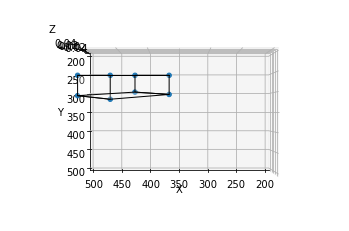

In [81]:
i = 0
X = np.zeros((C.shape[0], C.shape[1]-1))
p_ = copy.copy(p)
p_[0]*=2
for w in C:
    # w = np.vstack((np.reshape(w, (3, 1)), [1]))
    X[i] = project2DwTransform(w, princPtn, p_, s, d, t)
    i += 1

print(X)

plotProj(X)


## Changing coordinates of principal point
* Changing the coordinates of the principal point will have the effect of translating the image on the image plane

[[424.11341011 256.        ]
 [451.15455763 256.        ]
 [451.15455763 307.94556108]
 [424.11341011 317.03872944]
 [375.28242656 256.        ]
 [403.57803284 256.        ]
 [403.57803284 298.83263655]
 [375.28242656 304.83098355]]


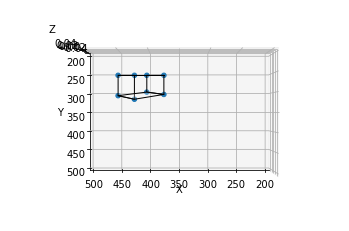

In [77]:
i = 0
X = np.zeros((C.shape[0], C.shape[1]-1))
pptn = princPtn
pptn[0]=320
# princPtn[0] = 320
for w in C:
    # w = np.vstack((np.reshape(w, (3, 1)), [1]))
    X[i] = project2DwTransform(w, pptn, p, s, d, t)
    i += 1

print(X)

plotProj(X)


## Increasing Skew factor

* Increasing the Skew factor will have the effect of distorting/skewing the image

[[360.11341011 256.        ]
 [387.15455763 256.        ]
 [392.34911374 307.94556108]
 [366.21728305 317.03872944]
 [311.28242656 256.        ]
 [339.57803284 256.        ]
 [343.86129649 298.83263655]
 [316.16552491 304.83098355]]


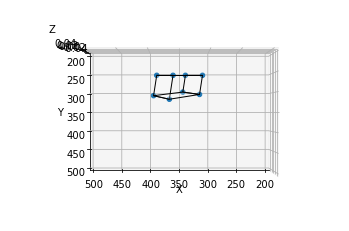

In [87]:
i = 0
X = np.zeros((C.shape[0], C.shape[1]-1))
# princPtn[0] = 320
for w in C:
    # w = np.vstack((np.reshape(w, (3, 1)), [1]))
    X[i] = project2DwTransform(w, princPtn, p, 20, d, t)
    i += 1

print(X)

plotProj(X)


## Changing rotation angle of camera
* Changing the rotation angle of the camera, changes the 2D projection, showing a new percepective

[[300.33893253 256.        ]
 [317.41350885 256.        ]
 [317.41350885 333.01843659]
 [300.33893253 374.31007916]
 [205.6908692  256.        ]
 [248.78527482 256.        ]
 [248.78527482 322.23834533]
 [205.6908692  350.64806333]]


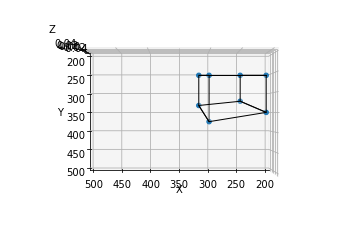

In [88]:
i = 0
X = np.zeros((C.shape[0], C.shape[1]-1))
# pp = princPtn
# pp[0] = 320
# princPtn[0] = 320
for w in C:
    # w = np.vstack((np.reshape(w, (3, 1)), [1]))
    X[i] = project2DwTransform(w, princPtn, p, s, d, np.radians(65))
    i += 1

print(X)

plotProj(X)
